In [37]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:/Users/Lekshmi Sasidharan/Desktop/DAP/PROJECT/DataSet/nyscancer-region.csv')

# Convert DataFrame to JSON
json_data = df.to_json(orient='records')

# Save JSON data to a file
with open(r'C:/Users/Lekshmi Sasidharan/Desktop/DAP/PROJECT/DataSet/nyscancer-region.json', 'w') as json_file:
    json_file.write(json_data)


#### Exporting to MongoDB

In [38]:
import pandas as pd
import pymongo

# Load the DataFrame from the JSON file
df = pd.read_json(r'C:/Users/Lekshmi Sasidharan/Desktop/DAP/PROJECT/DataSet/nyscancer-region.json')

# MongoDB connection settings
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["Datas"]
collection = db["Cancer Data"]

# Drop existing records in the collection
collection.delete_many({})

# Convert DataFrame to dictionary
records = df.to_dict(orient='records')

# Insert records into MongoDB collection
collection.insert_many(records)

# Load data from MongoDB into a DataFrame
cursor = collection.find({})
df_from_mongo = pd.DataFrame(list(cursor))

print("Data written successfully to MongoDB")

Data written successfully to MongoDB


#### Checking for null values in attribute columns

In [39]:


# Remove rows with null or NaN values in specified columns
columns_to_clean = ['OLUNG', 'HLUNG', 'LATITUDE', 'LONGITUDE', 'REGION']
df_cleaned = df_from_mongo.dropna(subset=columns_to_clean, how='any')

# Display the cleaned DataFrame
print(df_cleaned)


                            _id DOHREGION,C,12  LATITUDE  LONGITUDE OLUNG  \
1      662833e758aad7295aafafbf       3.60E+11   40.5746   -74.0567  !hgf   
2      662833e758aad7295aafafc0       3.60E+11   40.5746   -74.0567    10   
3      662833e758aad7295aafafc1       3.60E+11   40.5746   -74.0567     3   
4      662833e758aad7295aafafc2       3.60E+11   40.5746   -74.0567     4   
5      662833e758aad7295aafafc3       3.60E+11   40.5746   -74.0567    10   
...                         ...            ...       ...        ...   ...   
13843  662833e758aad7295aafe5d1       3.61E+11   40.7128   -74.0060     1   
13844  662833e758aad7295aafe5d2       3.61E+11   40.7128   -74.0060     3   
13845  662833e758aad7295aafe5d3       3.61E+11   40.7128   -74.0060     3   
13846  662833e758aad7295aafe5d4       3.61E+11   40.7128   -74.0060     4   
13847  662833e758aad7295aafe5d5       3.61E+11   40.7128   -74.0060     3   

       HLUNG  YEAR,C,4             REGION  
1          1      2009  40.5746

#### Checking if OLUNG has non numeric values

In [40]:
df_cleaned.loc[:, 'OLUNG'] = df_cleaned['OLUNG'].astype(str)
df_cleaned.loc[:, 'LATITUDE'] = df_cleaned['LATITUDE'].astype(str)
df_cleaned.loc[:, 'LONGITUDE'] = df_cleaned['LONGITUDE'].astype(str)

# Clean rows where 'OLUNG' and 'HLUNG' values are non-numeric
df_cleaned = df_cleaned[df_cleaned['OLUNG'].str.match(r'^\d*\.?\d+$')]
df_cleaned = df_cleaned[df_cleaned['LATITUDE'].str.match(r'^-?\d*\.?\d+$')]
df_cleaned = df_cleaned[df_cleaned['LONGITUDE'].str.match(r'^-?\d*\.?\d+$')]

print(df_cleaned)

                            _id DOHREGION,C,12 LATITUDE LONGITUDE OLUNG  \
2      662833e758aad7295aafafc0       3.60E+11  40.5746  -74.0567    10   
3      662833e758aad7295aafafc1       3.60E+11  40.5746  -74.0567     3   
4      662833e758aad7295aafafc2       3.60E+11  40.5746  -74.0567     4   
5      662833e758aad7295aafafc3       3.60E+11  40.5746  -74.0567    10   
6      662833e758aad7295aafafc4       3.60E+11  40.5746  -74.0567    15   
...                         ...            ...      ...       ...   ...   
13843  662833e758aad7295aafe5d1       3.61E+11  40.7128   -74.006     1   
13844  662833e758aad7295aafe5d2       3.61E+11  40.7128   -74.006     3   
13845  662833e758aad7295aafe5d3       3.61E+11  40.7128   -74.006     3   
13846  662833e758aad7295aafe5d4       3.61E+11  40.7128   -74.006     4   
13847  662833e758aad7295aafe5d5       3.61E+11  40.7128   -74.006     3   

       HLUNG  YEAR,C,4             REGION  
2          1      2009  40.5746, -74.0567  
3          

#### Reading raw cancer data available and eliminating areas not within New York City and sectioning into different regions

In [41]:
import pandas as pd

# Load the JSON data into a DataFrame
#df = pd.read_json(r'C:/Users/Lekshmi Sasidharan/Downloads/nyscancer-region.json')
# Convert 'LATITUDE' and 'LONGITUDE' columns to float type
df_cleaned['LATITUDE'] = df_cleaned['LATITUDE'].astype(float)
df_cleaned['LONGITUDE'] = df_cleaned['LONGITUDE'].astype(float)

# Define a function to assign regions based on latitude and longitude
def assign_region(latitude, longitude):
    if 40.5700 <= latitude <= 40.6500 and -74.03 <= longitude <= -73.97:
        return 'Brooklyn Southwest'
    elif 40.7600 <= latitude <= 40.8000 and -73.78 <= longitude <= -73.72:
        return 'Queens Northeast'
    elif 40.6300 <= latitude <= 40.7200 and -73.97 <= longitude <= -73.88:
        return 'Brooklyn East'
    elif 40.8000 <= latitude <= 40.9200 and -73.85 <= longitude <= -73.87:
        return 'Bronx North'
    elif 40.7000 <= latitude <= 40.8100 and -74.02 <= longitude <= -73.93:
        return 'Manhattan Central'
    elif 40.6800 <= latitude <= 40.7900 and -74.02 <= longitude <= -73.97:
        return 'Manhattan South'
    elif 40.8000 <= latitude <= 40.8800 and -73.9 <= longitude <= -73.87:
        return 'Bronx South Central'
    elif 40.6800 <= latitude <= 40.7700 and -73.92 <= longitude <= -73.79:
        return 'Queens West'
    elif 40.5700 <= latitude <= 40.6900 and -73.92 <= longitude <= -73.73:
        return 'Queens South'
    elif 40.7580 <= latitude <= 40.7610 and -73.984 <= longitude <= -73.986:
        return 'New York City Centre'
    elif 40.4800 <= latitude <= 40.6500 and -74.28 <= longitude <= -74.01:
        return 'Staten Island'
    else:
        return 'Unknown'

# Apply the function to the latitude and longitude columns to assign regions
#df['REGION'] = df.apply(lambda row: assign_region(row['LATITUDE'], row['LONGITUDE']), axis=1)

# Save the DataFrame to a new JSON file with the 'REGION' column added
#df.to_json(r'C:/Users/Lekshmi Sasidharan/Downloads/output_with_region.json', orient='records')

# Display the DataFrame
#print(df)
df_cleaned['REGION'] = df_cleaned.apply(lambda row: assign_region(row['LATITUDE'], row['LONGITUDE']), axis=1)

# Save the DataFrame to a new JSON file with the 'REGION' column added
#df_cleaned.to_json(r'C:/Users/Lekshmi Sasidharan/Downloads/output_with_region_cleaned.json', orient='records')

# Display the DataFrame
print(df_cleaned)
# Continue with your data processing steps as needed


                            _id DOHREGION,C,12  LATITUDE  LONGITUDE OLUNG  \
2      662833e758aad7295aafafc0       3.60E+11   40.5746   -74.0567    10   
3      662833e758aad7295aafafc1       3.60E+11   40.5746   -74.0567     3   
4      662833e758aad7295aafafc2       3.60E+11   40.5746   -74.0567     4   
5      662833e758aad7295aafafc3       3.60E+11   40.5746   -74.0567    10   
6      662833e758aad7295aafafc4       3.60E+11   40.5746   -74.0567    15   
...                         ...            ...       ...        ...   ...   
13843  662833e758aad7295aafe5d1       3.61E+11   40.7128   -74.0060     1   
13844  662833e758aad7295aafe5d2       3.61E+11   40.7128   -74.0060     3   
13845  662833e758aad7295aafe5d3       3.61E+11   40.7128   -74.0060     3   
13846  662833e758aad7295aafe5d4       3.61E+11   40.7128   -74.0060     4   
13847  662833e758aad7295aafe5d5       3.61E+11   40.7128   -74.0060     3   

       HLUNG  YEAR,C,4             REGION  
2          1      2009      Sta

#### Plotting number of cancer patients - regions of New York City

                            _id DOHREGION,C,12  LATITUDE  LONGITUDE  OLUNG  \
2      662833e758aad7295aafafc0       3.60E+11   40.5746   -74.0567     10   
3      662833e758aad7295aafafc1       3.60E+11   40.5746   -74.0567      3   
4      662833e758aad7295aafafc2       3.60E+11   40.5746   -74.0567      4   
5      662833e758aad7295aafafc3       3.60E+11   40.5746   -74.0567     10   
6      662833e758aad7295aafafc4       3.60E+11   40.5746   -74.0567     15   
...                         ...            ...       ...        ...    ...   
13843  662833e758aad7295aafe5d1       3.61E+11   40.7128   -74.0060      1   
13844  662833e758aad7295aafe5d2       3.61E+11   40.7128   -74.0060      3   
13845  662833e758aad7295aafe5d3       3.61E+11   40.7128   -74.0060      3   
13846  662833e758aad7295aafe5d4       3.61E+11   40.7128   -74.0060      4   
13847  662833e758aad7295aafe5d5       3.61E+11   40.7128   -74.0060      3   

       HLUNG  YEAR,C,4             REGION  
2          1      2

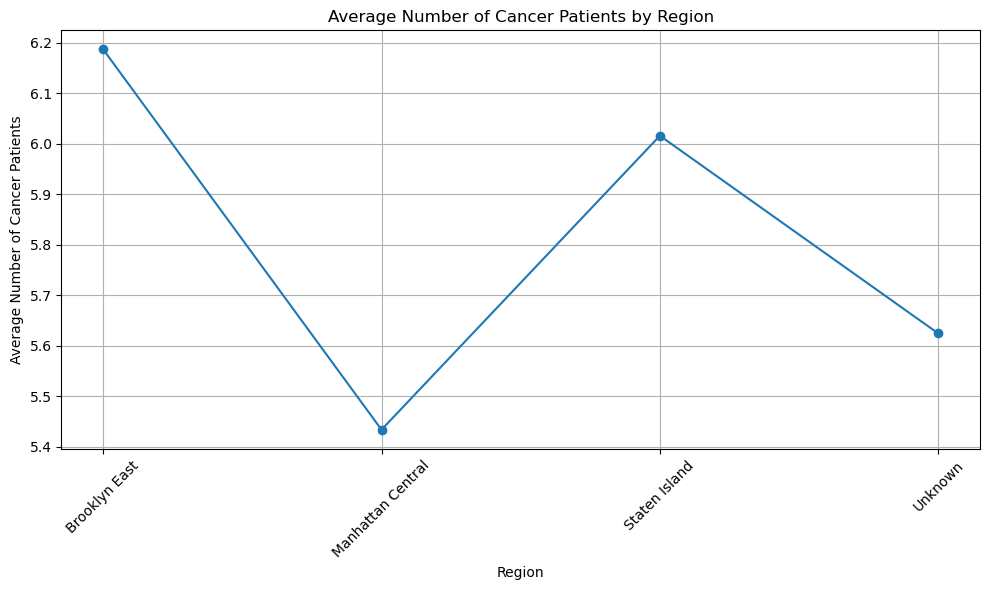

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is already defined

# Convert 'OLUNG' column to numeric type
df_cleaned['OLUNG'] = pd.to_numeric(df_cleaned['OLUNG'])
print(df_cleaned)

# Calculate the average number of cancer patients (OLUNG) for each region
avg_olung_by_region = df_cleaned.groupby('REGION')['OLUNG'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10,6))
plt.plot(avg_olung_by_region['REGION'], avg_olung_by_region['OLUNG'], marker='o', linestyle='-')
plt.title('Average Number of Cancer Patients by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Cancer Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()
